### Feature Engineering - Converting diffucult looking features into meaningful features

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [4]:
df = pd.read_csv('D:\Projects\Research\CapstoneCampusX\gurgaon_properties_cleaned_v1')

In [5]:
df.duplicated().sum()

122

In [6]:
df.head(2) # need to focus on areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Water Purifier', '5 Fan', '3 Geyser', '1 Stove', '20 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up area: 565 sq.ft. (52.49 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),2,2,2,not available,10.0,East,0 to 1 Year Old,"['Dwarka Expressway', 'RPS International School', 'Shree Shyam Public School', 'The Millenium School', 'GD Goenka Public School', 'Genesis Hospital', 'Yashlok Medical Centre', 'Sarup Multispeciality Hospital', 'IGI Airport', 'State Bank of India', 'Holiday Inn', 'Hyatt Regency', 'Footprints', 'Saheed Bhagat Singh Sports Academy', 'Bharat Petroleum']","['3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '1 Modular Kitchen', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park']"


### 1. areaWithType - Super built up area // Built Up Area // Carpet Area 

In [20]:
# Function to extract super built up area 

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [21]:
# Function to extract Built up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [22]:
# Function to check if area is given in sq.m. and convert in sq.ft. wherever needed
def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))  # factor to convert sqm to sqft
        return sq_m_value * 10.7639
    return area_value

In [25]:
# Breaking a single column (areaWithType) and populating 3 new columns in through that
# Extracting super Built up area and converting to sqft whenever needed

df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extracting Carpet area and converted to sqft wherever needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, "Carpet area"))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']),axis=1)

In [26]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1662,2.43,house,1632.0,Plot area 181.33(151.61 sq.m.)Built Up area: 345 sq.yards (288.46 sq.m.),NaN,345.0,NaN
645,0.37,flat,554.0,Carpet area: 553.85 (51.45 sq.m.),NaN,NaN,553.802655
2132,3.98,flat,2200.0,Super Built up area 2200(204.39 sq.m.),2200.0,NaN,NaN
253,1.85,flat,2150.0,Super Built up area 2150(199.74 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),2150.0,1650.0,1350.000000
515,0.30,flat,553.0,Super Built up area 553(51.38 sq.m.)Carpet area: 470 sq.ft. (43.66 sq.m.),553.0,NaN,470.000000


In [28]:
# Showing up only those rows which have all the 3 columns filled in. (This can be used to fill up the other rows which have NAN values in these 3 columns )
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape
#df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

(534, 7)

In [30]:
# Showing columns which have plot are given in their rows

df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,17.3,house,4466.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
3,4.3,house,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 sq.yards (137.96 sq.m.)Carpet area: 164 sq.yards (137.12 sq.m.),NaN,165.0,164.0
5,7.5,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
16,16.0,house,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 sq.yards (271.74 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),NaN,325.0,300.0
20,6.5,house,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 sq.yards (179.77 sq.m.),NaN,215.0,NaN


In [32]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [33]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [34]:
# Extracting those rows where all 3 are values (area) are missing

all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
 

In [35]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
5,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
32,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN
42,0.49,house,1150.0,Plot area 1150(106.84 sq.m.),NaN,NaN,NaN
53,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN


In [36]:
# Storing the index of all those values 
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [38]:
# Function to extract PlotArea from areWithType column

def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [39]:
# Storing Plot area in built_up_area (as both are same in case of houses)

all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [41]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
5,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
32,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.0,NaN
42,0.49,house,1150.0,Plot area 1150(106.84 sq.m.),NaN,1150.0,NaN
53,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.0,NaN


In [42]:
# The unit of area and built_up_area are different (so different values)
# Making a function to change both the columns into same units
# 9*sq yard -> 1 sq ft
# 10.7 sq mt -> sqft

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']   

In [47]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [48]:
all_nan_df.head(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area,build_up_area
2,17.30,house,4466.0,Plot area 502(419.74 sq.m.),NaN,4518.0,NaN,4518.0
5,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,3240.0
32,7.35,house,2475.0,Plot area 275(229.94 sq.m.),NaN,2475.0,NaN,2475.0
42,0.49,house,1150.0,Plot area 1150(106.84 sq.m.),NaN,1150.0,NaN,1150.0
53,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.0,NaN,3400.0
54,11.58,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,3240.0
56,10.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.0,NaN,3600.0
57,2.95,house,1845.0,Plot area 205(171.41 sq.m.),NaN,1845.0,NaN,1845.0
67,9.50,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.0,NaN,3600.0
73,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.0,NaN,783.0


In [51]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area,build_up_area
803,NaN,house,NaN,Plot area 500(418.06 sq.m.),NaN,500.0,NaN,500.0
1551,9.0,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN,2700.0
966,3.5,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.0,NaN,2610.0
2094,7.8,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN,3240.0
1108,1.7,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.0,NaN,1800.0


In [52]:
# update the original dataframe
df.update(all_nan_df)

In [55]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [56]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,not available,16.0,NaN,0 to 1 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Water Purifier', '5 Fan', '3 Geyser', '1 Stove', '20 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1342.0,NaN,NaN
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up area: 565 sq.ft. (52.49 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),2,2,2,not available,10.0,East,0 to 1 Year Old,"['Dwarka Expressway', 'RPS International School', 'Shree Shyam Public School', 'The Millenium School', 'GD Goenka Public School', 'Genesis Hospital', 'Yashlok Medical Centre', 'Sarup Multispeciality Hospital', 'IGI Airport', 'State Bank of India', 'Holiday Inn', 'Hyatt Regency', 'Footprints', 'Saheed Bhagat Singh Sports Academy', 'Bharat Petroleum']","['3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '1 Modular Kitchen', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park']",583.0,565.0,483.0
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,"pooja room,store room,study room,servant room",3.0,North,0 to 1 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacaranda Marg', 'NH 148A', 'Lancers International School', 'The NorthCap University', 'RBS HOSPITAL', 'Indira Gandhi Intl Airport']","['1 Exhaust Fan', '6 Geyser', '8 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,4518.0,NaN
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 sq.yards (137.96 sq.m.)Carpet area: 164 sq.yards (137.12 sq.m.),9,9,3+,"pooja room,others",3.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'State bank of india ATM', 'Axis bank ATM', 'Hdfc bank ATM', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Samvit Health Care', 'Sukhmani Hospital Pvt. Ltd', 'Dispencery', 'Bansal Medicare and Maternity Centre', 'Airforce Hospital', 'Pushpanjali Hospital Gurgaon', 'Pushpanjali Hospital', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Meher Clinic', 'Best Urologist Atcomplete Family Clinic', 'Smile Plus Dental Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Dayal Eye & Maternity Centre', 'Gurgaon Election Commission', 'Road and Traffic Authority', 

## 1. Additional room

In [57]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [58]:
# 5 Types of additonal rooms - Servant,Pooja,Store,Study, Others
# Performing one-hot enconding to the above categorical values
# For not available -> making all values 0

new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Inserting values in the newly created columns 

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [60]:
df.sample(10)[['study room', 'servant room', 'store room', 'pooja room', 'others','additionalRoom']]

,study room,servant room,store room,pooja room,others,additionalRoom
2062,0,0,0,0,0,not available
3256,1,1,0,1,1,"pooja room,study room,servant room,others"
2699,0,0,0,0,0,not available
3718,1,0,0,0,0,study room
995,1,1,0,1,0,"pooja room,study room,servant room"
2537,0,0,0,0,0,not available
2915,0,0,0,0,1,others
1282,0,0,0,0,0,not available
2720,0,1,0,0,0,servant room
3802,0,0,0,0,0,not available


### 3. agePossession

In [61]:
# Problem with this column -> Lots of categorical values 
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
Sep 2023                 4
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Nov 2024                 3
Jan 2025                 3
May 2024                 3
Feb 2024                 3
Apr 2026                 2
Jun 2027                 2
Sep 2025                 2
Oct 2025                 2
Jan 2026                 2
By 2027                  2
Mar 2025                 2
Aug 2025                 2
Dec 2026                 2
J

In [62]:
# Creating a function to define a specific category for all the above categories

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [63]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [64]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

### 4.furnishDetails

In [69]:
# Problem with this columns -> Lots of categories (list of furnishing items)

df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
526,"['1 Wardrobe', '1 Fan', '2 Light', '1 TV', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']",NaN
644,[],"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1908,"['1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Park', 'Visitor Parking']"
2902,NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'Park']"
2757,"['1 Fan', '1 Stove', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [71]:
# Probable solution - > Find uniques furnishing items
#                       # 18 uniques items -> but creating 18 new columns (but not all items are important)
                        # Another approch -> creating a new coloumn with 3 categories (furnished,semi-furnished,unfurnished) 
                        # To find which one should be under what category, I used clustering (K-means clusturing) -> By looking at the elbow curve(we decided the 3 categories)

In [73]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [74]:
furnishings_df.shape

(3803, 19)

In [75]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
furnishings_df.sample(5)

,Sofa,Modular Kitchen,Water Purifier,Bed,Exhaust Fan,Microwave,Wardrobe,AC,Dining Table,Washing Machine,Light,Curtains,Fan,Stove,Fridge,TV,Geyser,Chimney
1644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981,0,0,0,0,1,0,0,0,1,0,4,0,3,0,0,0,0,0
909,0,1,0,0,1,0,0,0,0,0,14,0,5,0,0,0,1,1
3298,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0
2335,1,1,1,0,1,1,5,3,1,1,10,0,5,1,1,1,3,0


In [81]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [83]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(furnishings_df)

In [84]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

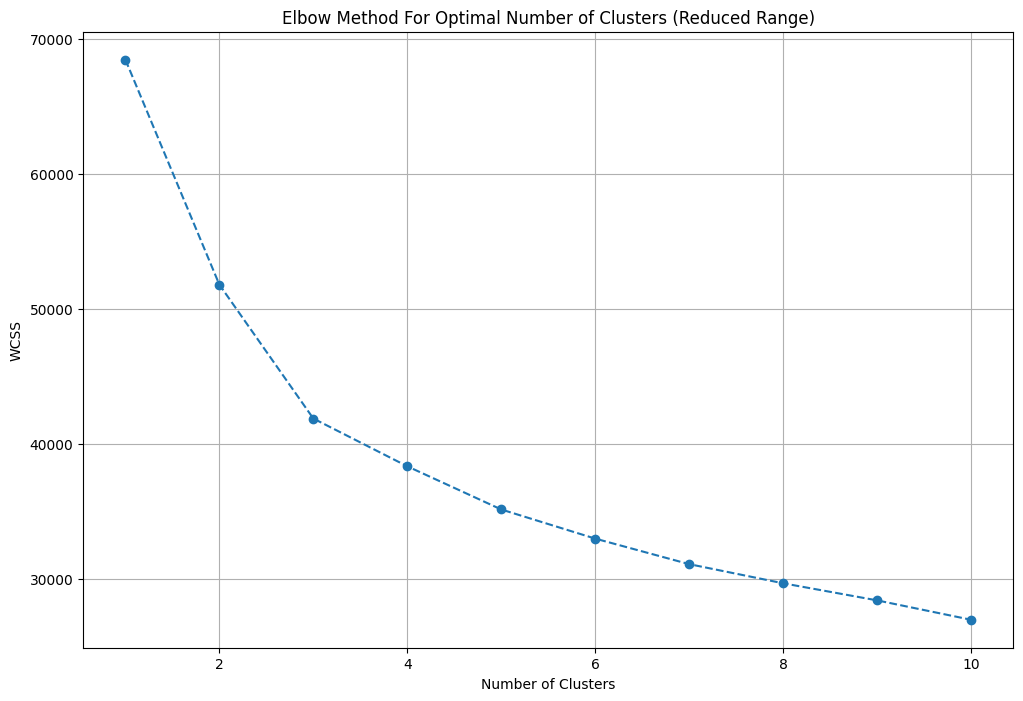

In [86]:
# Plotting the results

plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [87]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
df = df.iloc[:,:-18]

In [89]:
df['furnishing_type'] = cluster_assignments

In [90]:
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3385,"['1 Wardrobe', '2 Fan', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3749,NaN,2
458,"['5 Fan', '1 Exhaust Fan', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
161,"['7 Wardrobe', '16 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3154,NaN,2


### 5.Features

In [91]:
df[['features']].sample(5)

,features
1575,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
274,"['Private Garden / Terrace', 'Water purifier', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Spacious Interiors']"
3642,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre']"
1645,"['Centrally Air Conditioned', 'Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2760,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [92]:
df['features'].isnull().sum()

635

In [96]:
# Fetching the amenities from apartments dataset and adding it into features column of this dataset

import pandas as pd
aprt_df = pd.read_csv('D:/Projects/Research/CapstoneCampusX/Dataset/apartments.csv')
aprt_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [98]:
aprt_df['PropertyName'] = aprt_df['PropertyName'].str.lower()

In [99]:
temp_df = df[df['features'].isnull()]

In [100]:
temp_df.shape

(635, 26)

In [101]:
x = temp_df.merge(aprt_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [102]:
df.loc[temp_df.index,'features'] = x.values

In [103]:
df['features'].isnull().sum()

481

In [106]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [107]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [108]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
789,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,0,0
3636,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2234,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:

features_binary_df.shape

(3803, 130)

In [110]:
# Giving weights for each feature to generate an overall score 
# Assigning the weights based on perceived luxury (score by GPT)

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [111]:

df['luxury_score'] = luxury_score

In [112]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,...,NaN,NaN,0,0,0,0,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Water purifier, Maintenance Staff, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center]",79
1,flat,pivotal devaan,sector 84,0.41,7032.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up area: 565 sq.ft. (52.49 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),2,2,2,...,565.0,483.0,0,0,0,0,0,1,"[Security / Fire Alarm, Lift(s), Maintenance Staff, Park]",23
2,house,dlf city plots,sector 26,17.30,38734.0,4466.0,Plot area 502(419.74 sq.m.),6,7,3+,...,4518.0,NaN,1,1,1,1,0,1,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Centrally Air Conditioned, High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",124
3,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 sq.yards (137.96 sq.m.)Carpet area: 164 sq.yards (137.12 sq.m.),9,9,3+,...,165.0,164.0,0,0,0,1,1,1,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Maintenance Staff, Water Storage, Visitor Parking, Waste Disposal, Rain Water Harvesting]",41
4,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,...,2360.0,NaN,0,0,0,0,0,2,[],0


In [113]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [114]:

df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3786,flat,bestech park view residency,sector 2,1.59,8281.0,1920.0,Super Built up area 1920(178.37 sq.m.),3,4,3+,...,1920.0,NaN,NaN,0,1,0,0,0,2,100
1207,flat,hsiidc sidco aravali,manesar,0.90,3477.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.),3,3,3+,...,2588.0,1900.0,NaN,0,1,0,0,0,2,23
1818,house,tata primanti,sector 72,8.50,13492.0,6300.0,Plot area 6300(585.29 sq.m.),5,6,3+,...,NaN,6300.0,NaN,1,1,1,1,0,1,145
448,flat,ats triumph,sector 104,2.30,10000.0,2300.0,Carpet area: 2290 (212.75 sq.m.),3,4,3+,...,NaN,NaN,2290.0,0,1,0,0,0,2,117
556,house,independent,sector 25,9.90,29333.0,3375.0,Plot area 375(313.55 sq.m.),5,5,2,...,NaN,3375.0,NaN,0,0,0,1,0,1,106


In [115]:
df.shape

(3803, 23)

In [116]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)